In [1]:
import shutil
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import tensorflow_probability as tfp
import os 
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pyDOE import lhs
%load_ext autoreload
%autoreload 2
import time

W0406 00:55:39.774096 139772140107520 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tfm = tfp.models

In [3]:
inputs = np.loadtxt('./test_Data/X.txt')

In [4]:
outputs = np.loadtxt('./test_Data/Y.txt')

In [5]:
print(inputs.shape)

(100, 4)


In [6]:
labels = ['u1','u2', 'u3','u4']

In [7]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-2, labels = labels)

In [8]:
model_info = model.run_mcmc(mcmc_samples = 8000, num_leapfrog_steps = 3, estimate_noise = False, warm_up = True)

Noise variance is fixed.
Excecuting the warmup.


W0406 00:55:48.868714 139772140107520 deprecation.py:237] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bgputils.py:54: The name tf.log is deprecated. Please use tf.math.log instead.



Warmup: 
Warm-Up Iteration:   0 Acceptance Rate: 1.000
Warm-Up Iteration: 500 Acceptance Rate: 0.589
Warm-Up Iteration: 1000 Acceptance Rate: 0.590
Warm-Up Iteration: 1500 Acceptance Rate: 0.596
Warm-Up Iteration: 2000 Acceptance Rate: 0.597
Warm-Up Iteration: 2500 Acceptance Rate: 0.594
Warm-Up Iteration: 3000 Acceptance Rate: 0.596
Warm-Up Iteration: 3500 Acceptance Rate: 0.596
Warm-Up Iteration: 3999 Acceptance Rate: 0.593
Sampling in progress.


/root/.local/lib/python3.5/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "
W0406 00:56:07.289678 139772140107520 deprecation.py:323] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bayesiangp.py:238: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


Acceptance rate of the HMC sampling: 0.758375


In [9]:
print(model_info)

{'noise_level': 0.01, 'kernel_type': 'RBF', 'samples': {'kernel_inverse_lengthscales': array([[1.3530958 , 0.18084131, 0.31920978, 2.570607  ],
       [0.62142193, 0.19472477, 0.21581832, 3.6755445 ],
       [0.6176082 , 0.32592407, 0.2111592 , 4.274206  ],
       ...,
       [1.4995289 , 0.32534027, 0.34689653, 1.6961328 ],
       [1.7568831 , 0.2076578 , 0.3070247 , 1.5596042 ],
       [1.009691  , 0.27578738, 0.21844235, 2.548403  ]], dtype=float32), 'gp_constant_mean_function': array([0.05232741, 0.19059947, 0.17453924, ..., 0.13779557, 0.17944545,
       0.06252274], dtype=float32), 'kernel_variance': array([0.77386445, 0.9722171 , 0.90095913, ..., 0.8797219 , 0.72064465,
       0.9479202 ], dtype=float32)}}


In [10]:
model = tfm.BGP_model(inputs, outputs, model_info = model_info, labels = labels)

/root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bgpmodel.py:57: UserWarning: Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.
  warnings.warn("Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.")


In [11]:
model.plot_chains(directory_path  = './')

In [12]:
mean_pos, std_pos, samples = model.predict(inputs, with_point_samples = True)

W0406 00:58:18.761689 139772140107520 deprecation.py:237] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bgputils.py:30: The name tf.matrix_triangular_solve is deprecated. Please use tf.linalg.triangular_solve instead.



In [13]:
lower = np.percentile(samples,2.5, axis = 0)
upper = np.percentile(samples,97.5, axis = 0)

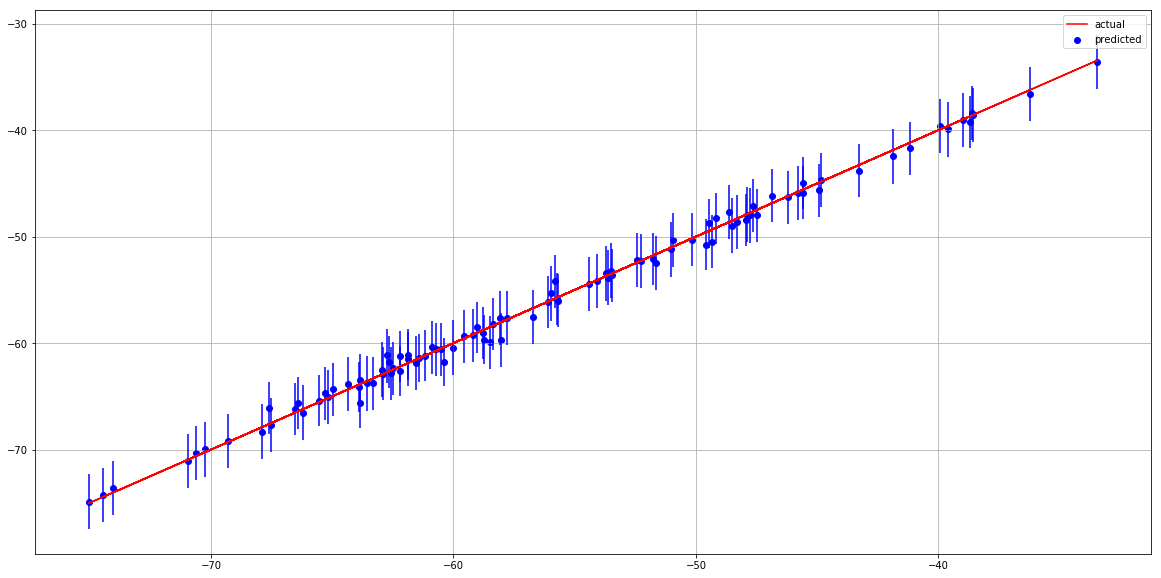

In [14]:
# Predicted vs actual
plt.figure(figsize =(20,10))
plt.plot(outputs, outputs , color = 'red', label ='actual')
plt.scatter(outputs, mean_pos, color = 'blue', label = 'predicted')
plt.vlines(outputs,lower, upper, color = 'blue')
plt.legend()
plt.grid()